<a href="https://colab.research.google.com/github/aritradas080/Spam-Email-Detection/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Data collection and preprocessing

In [ ]:
#loading the data from csv file to a pandas dataframe
raw_mail_data = pd.read_csv("/content/mail_data.csv")
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),"")
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking the number of rows and columns in data frame
mail_data.shape

(5572, 2)

In [ ]:
#label encoding
#spam mail as 0
#ham mail as 1
mail_data.loc[mail_data["Category"]=="spam","Category",]=0
mail_data.loc[mail_data["Category"]=="ham","Category",]=1

In [ ]:
#separating the data as text and label
X=mail_data["Message"]
Y=mail_data["Category"]

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [ ]:
#spliting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
X.shape

(5572,)

In [ ]:
X_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

In [ ]:
#feature extraction
#transform the text data to feature vector that can be used as input to Support Vector Machine
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
#converion of y_train and y_test values into integers
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [ ]:
#training the model
#Support Vector Machine
model = svm.SVC()
model.fit(X_train_features,Y_train)

SVC()

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train_features,Y_train)

LogisticRegression()

In [ ]:
model3 = KNeighborsClassifier()
model3.fit(X_train_features,Y_train)

KNeighborsClassifier()

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(X_train_features,Y_train)

DecisionTreeClassifier()

Accuracy check on training data with SVM

In [ ]:
#evaluating training model
#prediction on training data
prediction_train = model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train,prediction_train)
accuracy_train

0.99798070450976

Accuracy check on training data with Logistic Regression

In [ ]:
#evaluating with logistic regression
#prediction on training data
prediction_train_logisticregression = model2.predict(X_train_features)
accuracy_train_logisticregression = accuracy_score(Y_train,prediction_train_logisticregression)
accuracy_train_logisticregression

0.9670181736594121

Accuracy check on training data with KNN

In [ ]:
#evaluating with KNN
#prediction on training data
prediction_train_KNN = model3.predict(X_train_features)
accuracy_train_KNN = accuracy_score(Y_train,prediction_train_KNN)
accuracy_train_KNN

0.9201256450527261

Accuracy check on training data with Decision Tree

In [ ]:
#evaluating with Decision tree
#prediction on training data
prediction_train_DT = model4.predict(X_train_features)
accuracy_train_DT = accuracy_score(Y_train,prediction_train_DT)
accuracy_train_DT

1.0

Accuracy check on testing data with SVM

In [ ]:
#prediction on text data
prediction_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test,prediction_test)
accuracy_test

0.979372197309417

Accuracy check on testing data with Logistic Regression

In [ ]:
prediction_test_logisticregression = model2.predict(X_test_features)
accuracy_test_logisticregression = accuracy_score(Y_test,prediction_test_logisticregression)
accuracy_test_logisticregression

0.9659192825112107

Accuracy check on testing data with KNN

In [ ]:
prediction_test_KNN = model3.predict(X_test_features)
accuracy_test_KNN = accuracy_score(Y_test,prediction_test_KNN)
accuracy_test_KNN

0.9094170403587444

Accuracy check on testing data with DT

In [ ]:
prediction_test_DT = model4.predict(X_test_features)
accuracy_test_DT = accuracy_score(Y_test,prediction_test_DT)
accuracy_test_DT

0.967713004484305

In [ ]:
#building a predictive system
input_mail = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"]

#convert text to feature vector
input_data_features=feature_extraction.transform(input_mail)
#prediction on input mail
prediction = model.predict(input_data_features)
prediction
if (prediction[0]==1):
  print("HAM mail")
else:
  print("SPAM mail")

SPAM mail


In [ ]:
cm=confusion_matrix(Y_test,prediction_test)
cm

array([[132,  23],
       [  0, 960]])

Text(58.222222222222214, 0.5, 'Truth')

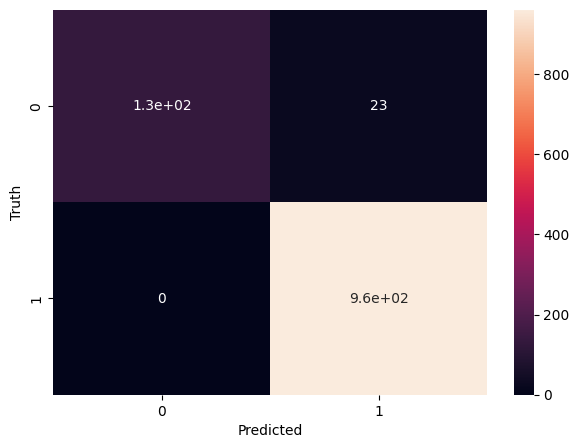

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')